# Analysez les ventes de votre entreprise


1- Nettoyage et de préparation des données :

Validation des données : Assurez-vous que les colonnes, types de données et valeurs respectent les contraintes du schéma cible.
Détection des anomalies : Détecter et traiter les incohérences dans les fichiers produits, ventes, clients (ex : valeurs erronées, valeurs aberrantes, produits vendus mais non présents dans la table products, anomalies dans les prix, etc.).
Transformation des données : Appliquer les transformations nécessaires (ex : mapping des sous catégories, ajout de nvelles colonnes, etc ).
2- Prendre en compte la nouvelle colonne sub_category dans le schéma de données du datamart des ventes et mettre à jour le pipeline ETL pour que la nouvelle sous-catégorie soit incluse lors du chargement des données de la table des ventes.

3- faire une EDA (analyse exploratoire) et vérifier /détecter la présence d’anomalies potentielles .

4- Tester et valider les modifications pour s’assurer que les données sont correctement intégrées.

## Import

In [62]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Chargement des données

In [63]:
data_path = r'C:\Users\Mehdi\Documents\simplon_brief_data_eng\Brief_22_analyse_vente_entreprise\data'

clients = pd.read_csv(f"{data_path}/clients.csv", sep=';')
produits = pd.read_csv(f"{data_path}/produits_sous-categorie.csv")
ventes = pd.read_csv(f"{data_path}/ventes.csv")

In [64]:
clients

client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]

In [65]:
clients.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [66]:
clients.nunique()


client_id    8623
sex             2
birth          77
dtype: int64

In [67]:
clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [68]:
produits

product_id     category        sub_category   price  stock_quantity
0        0_1421    Vêtements            T-shirts   19.99              39
1        0_1368    Vêtements            T-shirts    5.13              76
2         0_731    Vêtements            T-shirts   17.99               2
3         1_587  Accessoires         Sacs à main    4.99              55
4        0_1507    Vêtements            T-shirts    3.99              81
...         ...          ...                 ...     ...             ...
3282       2_23      Montres  Montres connectées  115.99              38
3283      0_146    Vêtements            T-shirts   17.14              55
3284      0_802    Vêtements            T-shirts   11.22              64
3285      1_140  Accessoires         Sacs à main   38.56               1
3286     0_1920    Vêtements            T-shirts   25.16              16

[3287 rows x 5 columns]

In [69]:
produits.nunique()


product_id        3287
category             3
sub_category         3
price             1455
stock_quantity      99
dtype: int64

In [70]:
produits.isnull().sum()

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

In [71]:
produits.dtypes

product_id         object
category           object
sub_category       object
price             float64
stock_quantity      int64
dtype: object

In [72]:
ventes

id_prod                        date session_id client_id  quantity_sold
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450              5
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277              6
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270              3
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597              8
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242              2
...        ...                         ...        ...       ...            ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454              1
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268             10
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137              7
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5              8
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714              3

[337016 rows x 5 columns]

In [73]:
ventes.nunique()

id_prod            3266
date             336855
session_id       169195
client_id          8602
quantity_sold        10
dtype: int64

## Nettoyage colonne date

In [74]:
ventes[ventes['id_prod']== 'T_0']

id_prod                             date session_id client_id  \
1431       T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1   
2365       T_0  test_2021-03-01 02:30:02.237446        s_0      ct_1   
2895       T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1   
5955       T_0  test_2021-03-01 02:30:02.237441        s_0      ct_0   
7283       T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1   
...        ...                              ...        ...       ...   
332594     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_0   
332705     T_0  test_2021-03-01 02:30:02.237423        s_0      ct_1   
332730     T_0  test_2021-03-01 02:30:02.237421        s_0      ct_1   
333442     T_0  test_2021-03-01 02:30:02.237431        s_0      ct_1   
335279     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0   

        quantity_sold  
1431                3  
2365                1  
2895                9  
5955                3  
7283                2  
...               ...  
332594              2  
332705              4  
332730              1  
333442              4  
335279              8  

[200 rows x 5 columns]

In [75]:
# Suppresion de 'test_'
ventes = ventes[~ventes['date'].str.startswith('test_', na=False)]

In [76]:
ventes[ventes['id_prod']== 'T_0']

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold]
Index: []

In [77]:
ventes.dtypes

id_prod          object
date             object
session_id       object
client_id        object
quantity_sold     int64
dtype: object

In [78]:
ventes.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64

In [79]:
# date to datetime
ventes['date'] = pd.to_datetime(ventes['date'], errors='coerce')
ventes.dtypes

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_21900\1927781164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes['date'] = pd.to_datetime(ventes['date'], errors='coerce')


id_prod                  object
date             datetime64[ns]
session_id               object
client_id                object
quantity_sold             int64
dtype: object

In [80]:
ventes.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64

## Produits et clients absent du dataset ventes

In [81]:
sans_clients = ventes[~ventes['client_id'].isin(clients['client_id'])]
sans_products = ventes[~ventes['id_prod'].isin(produits['product_id'])]

In [82]:
sans_clients

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold]
Index: []

In [83]:
sans_products

id_prod                       date session_id client_id  quantity_sold
6235    0_2245 2021-06-17 03:03:12.668129    s_49705    c_1533             10
10802   0_2245 2021-06-16 05:53:01.627491    s_49323    c_7954              2
14051   0_2245 2021-11-24 17:35:59.911427   s_124474    c_5120              5
17486   0_2245 2022-02-28 18:08:49.875709   s_172304    c_4964              7
21078   0_2245 2021-03-01 00:09:29.301897        s_3     c_580             10
...        ...                        ...        ...       ...            ...
322710  0_2245 2021-04-06 19:59:19.462288    s_16936    c_4167              8
329417  0_2245 2021-03-30 23:29:02.347672    s_13738    c_7790              5
330490  0_2245 2021-12-03 14:14:40.444177   s_128815    c_6189              2
335531  0_2245 2021-04-27 18:58:47.703374    s_26624    c_1595              2
336220  0_2245 2021-05-01 03:35:03.146305    s_28235    c_5714              5

[103 rows x 5 columns]

In [84]:
produits

product_id     category        sub_category   price  stock_quantity
0        0_1421    Vêtements            T-shirts   19.99              39
1        0_1368    Vêtements            T-shirts    5.13              76
2         0_731    Vêtements            T-shirts   17.99               2
3         1_587  Accessoires         Sacs à main    4.99              55
4        0_1507    Vêtements            T-shirts    3.99              81
...         ...          ...                 ...     ...             ...
3282       2_23      Montres  Montres connectées  115.99              38
3283      0_146    Vêtements            T-shirts   17.14              55
3284      0_802    Vêtements            T-shirts   11.22              64
3285      1_140  Accessoires         Sacs à main   38.56               1
3286     0_1920    Vêtements            T-shirts   25.16              16

[3287 rows x 5 columns]

In [85]:
ventes

id_prod                       date session_id client_id  quantity_sold
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450              5
1        2_226 2022-02-03 01:55:53.276402   s_159142     c_277              6
2        1_374 2021-09-23 15:13:46.938559    s_94290    c_4270              3
3       0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597              8
4       0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242              2
...        ...                        ...        ...       ...            ...
337011   1_671 2021-05-28 12:35:46.214839    s_40720    c_3454              1
337012   0_759 2021-06-19 00:19:23.917703    s_50568    c_6268             10
337013  0_1256 2021-03-16 17:31:59.442007     s_7219    c_4137              7
337014   2_227 2021-10-30 16:50:15.997750   s_112349       c_5              8
337015  0_1417 2021-06-26 14:38:19.732946    s_54117    c_6714              3

[336816 rows x 5 columns]

## Merge entre ventes et produit

In [119]:
ventes_produits = ventes.merge(produits[['product_id', 'sub_category','stock_quantity','price']], 
                      left_on='id_prod', right_on='product_id', 
                      how='left').drop(columns=['product_id'])
ventes_produits

id_prod                       date session_id client_id  quantity_sold  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450              5   
1        2_226 2022-02-03 01:55:53.276402   s_159142     c_277              6   
2        1_374 2021-09-23 15:13:46.938559    s_94290    c_4270              3   
3       0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597              8   
4       0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242              2   
...        ...                        ...        ...       ...            ...   
336811   1_671 2021-05-28 12:35:46.214839    s_40720    c_3454              1   
336812   0_759 2021-06-19 00:19:23.917703    s_50568    c_6268             10   
336813  0_1256 2021-03-16 17:31:59.442007     s_7219    c_4137              7   
336814   2_227 2021-10-30 16:50:15.997750   s_112349       c_5              8   
336815  0_1417 2021-06-26 14:38:19.732946    s_54117    c_6714              3   

              sub_category  stock_quantity  price  
0                 T-shirts            48.0   4.99  
1       Montres connectées            63.0  65.75  
2              Sacs à main            97.0  10.71  
3                 T-shirts            57.0   4.20  
4                 T-shirts            59.0   8.99  
...                    ...             ...    ...  
336811         Sacs à main            13.0  31.99  
336812            T-shirts            65.0  22.99  
336813            T-shirts            13.0  11.03  
336814  Montres connectées            94.0  50.99  
336815            T-shirts            38.0  17.99  

[336816 rows x 8 columns]

In [121]:
ventes_completes = ventes_produits.merge(clients[['client_id', 'sex', 'birth']], 
                                on='client_id', 
                                how='left')
ventes_completes

id_prod                       date session_id client_id  quantity_sold  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450              5   
1        2_226 2022-02-03 01:55:53.276402   s_159142     c_277              6   
2        1_374 2021-09-23 15:13:46.938559    s_94290    c_4270              3   
3       0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597              8   
4       0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242              2   
...        ...                        ...        ...       ...            ...   
336811   1_671 2021-05-28 12:35:46.214839    s_40720    c_3454              1   
336812   0_759 2021-06-19 00:19:23.917703    s_50568    c_6268             10   
336813  0_1256 2021-03-16 17:31:59.442007     s_7219    c_4137              7   
336814   2_227 2021-10-30 16:50:15.997750   s_112349       c_5              8   
336815  0_1417 2021-06-26 14:38:19.732946    s_54117    c_6714              3   

              sub_category  stock_quantity  price sex  birth  
0                 T-shirts            48.0   4.99   f   1977  
1       Montres connectées            63.0  65.75   f   2000  
2              Sacs à main            97.0  10.71   f   1979  
3                 T-shirts            57.0   4.20   m   1963  
4                 T-shirts            59.0   8.99   f   1980  
...                    ...             ...    ...  ..    ...  
336811         Sacs à main            13.0  31.99   m   1969  
336812            T-shirts            65.0  22.99   m   1991  
336813            T-shirts            13.0  11.03   f   1968  
336814  Montres connectées            94.0  50.99   f   1994  
336815            T-shirts            38.0  17.99   f   1968  

[336816 rows x 10 columns]

In [122]:
ventes_completes.isnull().sum()

id_prod             0
date                0
session_id          0
client_id           0
quantity_sold       0
sub_category      103
stock_quantity    103
price             103
sex                 0
birth               0
dtype: int64

## suppression de birth = -2001

In [130]:
ventes_completes = ventes_completes[~((ventes_completes['client_id'] == 'ct_1') & (ventes_completes['birth'] == -2001))]
ventes_completes[ventes_completes['birth'] == -2001]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold, sub_category, stock_quantity, price, sex, birth, year_of_sale, age, month, day_of_week]
Index: []

## Ajout des colonnes en liens avec la date

In [123]:
ventes_completes['year_of_sale'] = pd.to_datetime(ventes_completes['date']).dt.year
ventes_completes['age'] = ventes_completes['year_of_sale'] - ventes_completes['birth']
ventes_completes['month'] = pd.to_datetime(ventes_completes['date']).dt.month
ventes_completes['day_of_week'] = pd.to_datetime(ventes_completes['date']).dt.dayofweek  

ventes_completes

id_prod                       date session_id client_id  quantity_sold  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450              5   
1        2_226 2022-02-03 01:55:53.276402   s_159142     c_277              6   
2        1_374 2021-09-23 15:13:46.938559    s_94290    c_4270              3   
3       0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597              8   
4       0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242              2   
...        ...                        ...        ...       ...            ...   
336811   1_671 2021-05-28 12:35:46.214839    s_40720    c_3454              1   
336812   0_759 2021-06-19 00:19:23.917703    s_50568    c_6268             10   
336813  0_1256 2021-03-16 17:31:59.442007     s_7219    c_4137              7   
336814   2_227 2021-10-30 16:50:15.997750   s_112349       c_5              8   
336815  0_1417 2021-06-26 14:38:19.732946    s_54117    c_6714              3   

              sub_category  stock_quantity  price sex  birth  year_of_sale  \
0                 T-shirts            48.0   4.99   f   1977          2021   
1       Montres connectées            63.0  65.75   f   2000          2022   
2              Sacs à main            97.0  10.71   f   1979          2021   
3                 T-shirts            57.0   4.20   m   1963          2021   
4                 T-shirts            59.0   8.99   f   1980          2021   
...                    ...             ...    ...  ..    ...           ...   
336811         Sacs à main            13.0  31.99   m   1969          2021   
336812            T-shirts            65.0  22.99   m   1991          2021   
336813            T-shirts            13.0  11.03   f   1968          2021   
336814  Montres connectées            94.0  50.99   f   1994          2021   
336815            T-shirts            38.0  17.99   f   1968          2021   

        age  month  day_of_week  
0        44      4            5  
1        22      2            3  
2        42      9            3  
3        58     10            6  
4        41      7            5  
...     ...    ...          ...  
336811   52      5            4  
336812   30      6            5  
336813   53      3            1  
336814   27     10            5  
336815   53      6            5  

[336816 rows x 14 columns]

## Nettoyage des NaN sub_category

In [124]:
ventes_nan = ventes_completes[ventes_completes.isnull().any(axis=1)]
ventes_nan

id_prod                       date session_id client_id  quantity_sold  \
6231    0_2245 2021-06-17 03:03:12.668129    s_49705    c_1533             10   
10797   0_2245 2021-06-16 05:53:01.627491    s_49323    c_7954              2   
14045   0_2245 2021-11-24 17:35:59.911427   s_124474    c_5120              5   
17480   0_2245 2022-02-28 18:08:49.875709   s_172304    c_4964              7   
21071   0_2245 2021-03-01 00:09:29.301897        s_3     c_580             10   
...        ...                        ...        ...       ...            ...   
322523  0_2245 2021-04-06 19:59:19.462288    s_16936    c_4167              8   
329226  0_2245 2021-03-30 23:29:02.347672    s_13738    c_7790              5   
330297  0_2245 2021-12-03 14:14:40.444177   s_128815    c_6189              2   
335331  0_2245 2021-04-27 18:58:47.703374    s_26624    c_1595              2   
336020  0_2245 2021-05-01 03:35:03.146305    s_28235    c_5714              5   

       sub_category  stock_quantity  price sex  birth  year_of_sale  age  \
6231            NaN             NaN    NaN   m   1972          2021   49   
10797           NaN             NaN    NaN   m   1973          2021   48   
14045           NaN             NaN    NaN   f   1975          2021   46   
17480           NaN             NaN    NaN   f   1982          2022   40   
21071           NaN             NaN    NaN   m   1988          2021   33   
...             ...             ...    ...  ..    ...           ...  ...   
322523          NaN             NaN    NaN   f   1979          2021   42   
329226          NaN             NaN    NaN   f   1983          2021   38   
330297          NaN             NaN    NaN   f   1984          2021   37   
335331          NaN             NaN    NaN   f   1973          2021   48   
336020          NaN             NaN    NaN   f   1972          2021   49   

        month  day_of_week  
6231        6            3  
10797       6            2  
14045      11            2  
17480       2            0  
21071       3            0  
...       ...          ...  
322523      4            1  
329226      3            1  
330297     12            4  
335331      4            1  
336020      5            5  

[103 rows x 14 columns]

In [125]:
# Remplacer les NaN dans 'sub_category'
ventes_completes.loc[(ventes_completes['id_prod'] == '0_2245') & (ventes_completes['sub_category'].isna()), 'sub_category'] = 'T-shirts'

In [126]:
# médiane pour 'stock_quantity' et 'price' uniquement avec la sub_category 'T-shirts'
median_stock_tshirt = ventes_completes.loc[ventes_completes['sub_category'] == 'T-shirts', 'stock_quantity'].median()
median_price_tshirt = ventes_completes.loc[ventes_completes['sub_category'] == 'T-shirts', 'price'].median()

ventes_completes.loc[(ventes_completes['sub_category'] == 'T-shirts') & (ventes_completes['stock_quantity'].isna()), 'stock_quantity'] = median_stock_tshirt
ventes_completes.loc[(ventes_completes['sub_category'] == 'T-shirts') & (ventes_completes['price'].isna()), 'price'] = median_price_tshirt

ventes_completes.head()


id_prod                       date session_id client_id  quantity_sold  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450              5   
1   2_226 2022-02-03 01:55:53.276402   s_159142     c_277              6   
2   1_374 2021-09-23 15:13:46.938559    s_94290    c_4270              3   
3  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597              8   
4  0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242              2   

         sub_category  stock_quantity  price sex  birth  year_of_sale  age  \
0            T-shirts            48.0   4.99   f   1977          2021   44   
1  Montres connectées            63.0  65.75   f   2000          2022   22   
2         Sacs à main            97.0  10.71   f   1979          2021   42   
3            T-shirts            57.0   4.20   m   1963          2021   58   
4            T-shirts            59.0   8.99   f   1980          2021   41   

   month  day_of_week  
0      4            5  
1      2            3  
2      9            3  
3     10            6  
4      7            5

In [127]:
ventes_completes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         336816 non-null  object        
 1   date            336816 non-null  datetime64[ns]
 2   session_id      336816 non-null  object        
 3   client_id       336816 non-null  object        
 4   quantity_sold   336816 non-null  int64         
 5   sub_category    336816 non-null  object        
 6   stock_quantity  336816 non-null  float64       
 7   price           336816 non-null  float64       
 8   sex             336816 non-null  object        
 9   birth           336816 non-null  int64         
 10  year_of_sale    336816 non-null  int32         
 11  age             336816 non-null  int64         
 12  month           336816 non-null  int32         
 13  day_of_week     336816 non-null  int32         
dtypes: datetime64[ns](1), float64(2), in

## Graph

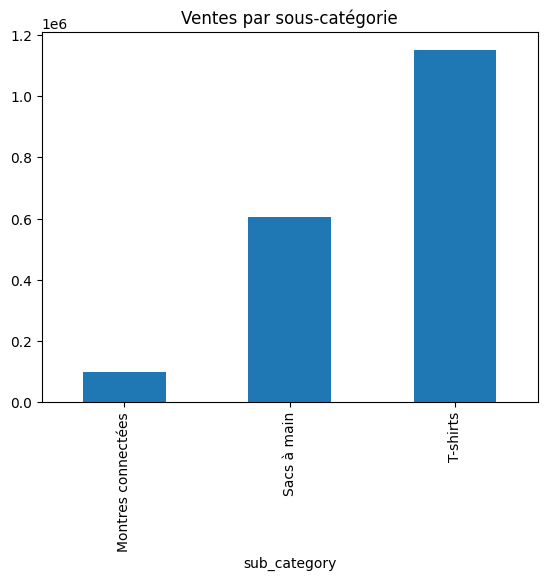

In [106]:
ventes_par_sub_category = ventes_completes.groupby('sub_category')['quantity_sold'].sum()
ventes_par_sub_category.plot(kind='bar')
plt.title('Ventes par sous-catégorie')
plt.show()

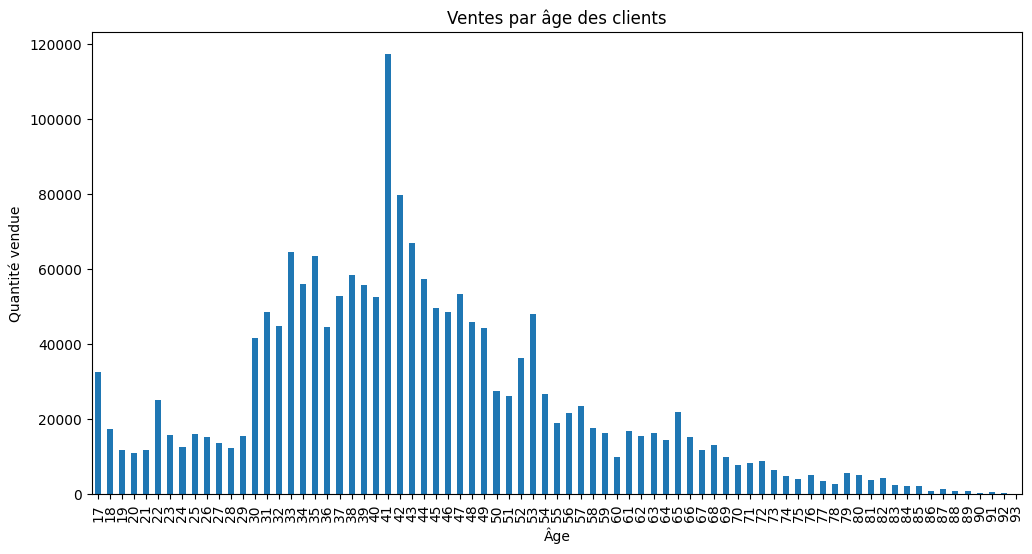

In [107]:
#Distribution des ventes par âge des clients
ventes_par_age = ventes_completes.groupby('age')['quantity_sold'].sum()
ventes_par_age.plot(kind='bar', figsize=(12, 6))
plt.title("Ventes par âge des clients")
plt.xlabel("Âge")
plt.ylabel("Quantité vendue")
plt.show()

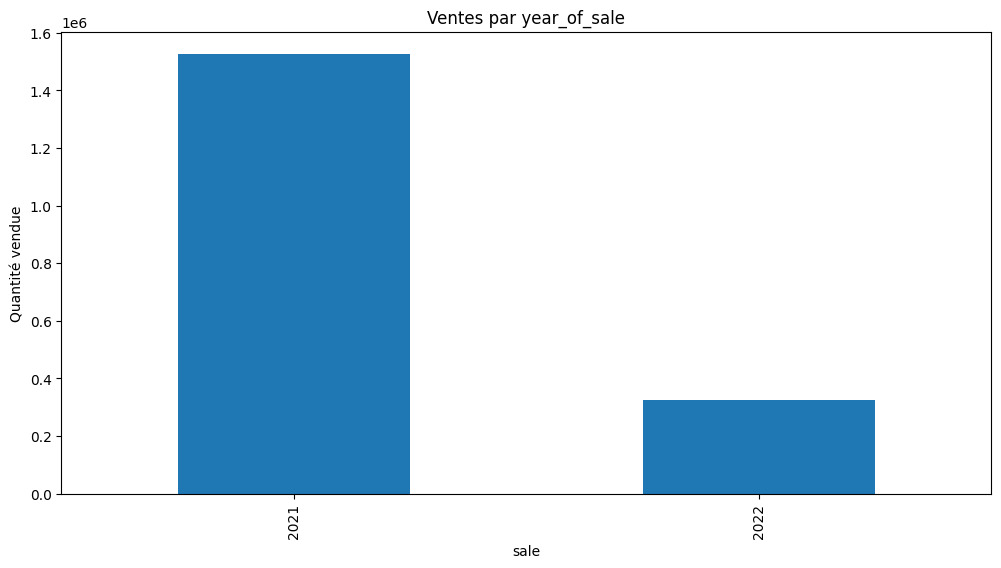

In [108]:
#Distribution des ventes par années
ventes_year_of_sale = ventes_completes.groupby('year_of_sale')['quantity_sold'].sum()
ventes_year_of_sale.plot(kind='bar', figsize=(12, 6))
plt.title("Ventes par year_of_sale")
plt.xlabel("sale")
plt.ylabel("Quantité vendue")
plt.show()

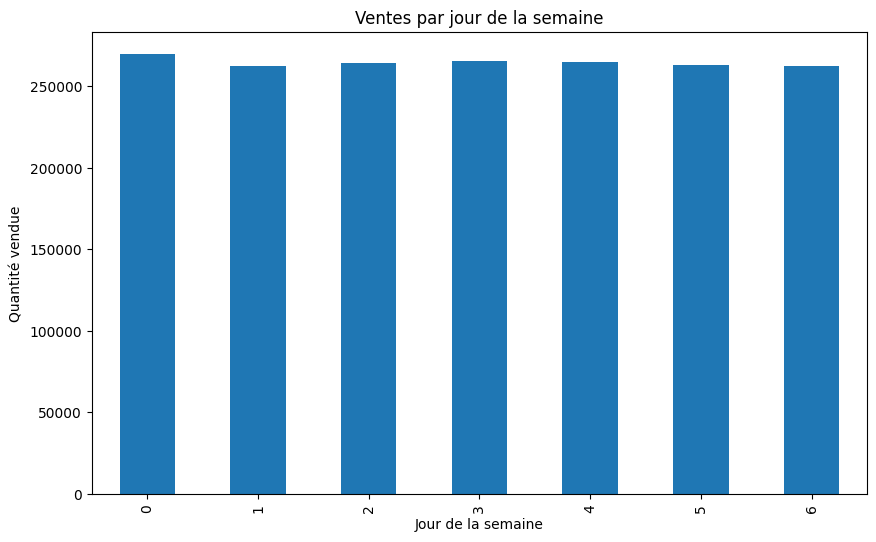

In [109]:
#ventes par jour
ventes_par_jour = ventes_completes.groupby('day_of_week')['quantity_sold'].sum()
ventes_par_jour.plot(kind='bar', figsize=(10, 6))
plt.title("Ventes par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Quantité vendue")
plt.show()


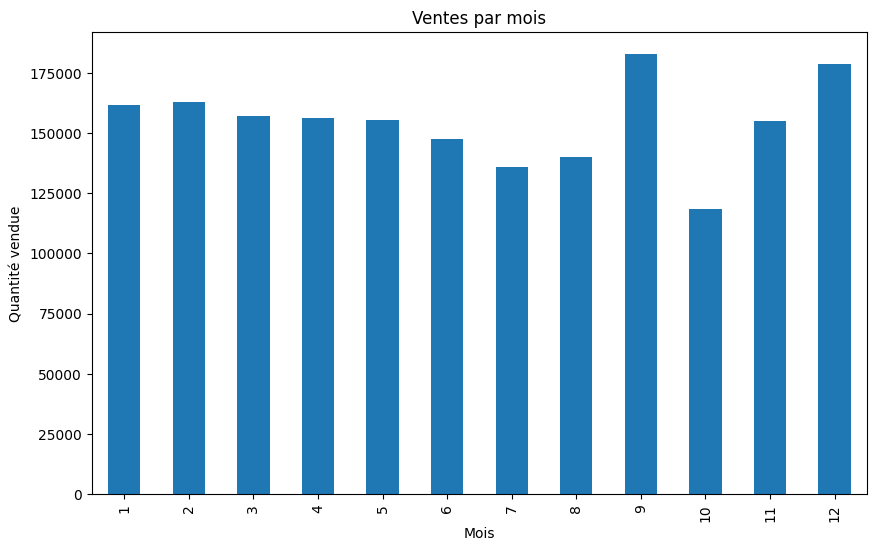

In [110]:
# vente par mois
ventes_par_mois = ventes_completes.groupby('month')['quantity_sold'].sum()
ventes_par_mois.plot(kind='bar', figsize=(10, 6))
plt.title("Ventes par mois")
plt.xlabel("Mois")
plt.ylabel("Quantité vendue")
plt.show()


In [111]:
Q1 = ventes_completes['age'].quantile(0.25)
Q3 = ventes_completes['age'].quantile(0.75)
IQR = Q3 - Q1

seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR

valeurs_aberrantes = ventes_completes[(ventes_completes['age'] < seuil_bas) | 
                                      (ventes_completes['age'] > seuil_haut)]

print("Valeurs aberrantes pour 'age' :")
valeurs_aberrantes


Valeurs aberrantes pour 'age' :


id_prod                       date session_id client_id  quantity_sold  \
133      1_385 2021-11-12 05:38:47.843822   s_118374    c_2438              4   
293      1_468 2021-03-24 00:16:14.572159    s_10588    c_1458              2   
519     0_1224 2021-11-07 10:29:44.113292   s_116046    c_3989              3   
568       1_13 2021-06-26 17:59:29.336033    s_54185    c_8384              5   
594      1_570 2021-04-08 22:02:24.714866    s_17890    c_7797              6   
...        ...                        ...        ...       ...            ...   
336626   1_413 2021-12-22 19:00:49.668125   s_138380    c_8010              8   
336631   1_432 2021-12-18 10:59:00.347946   s_136206    c_6425              6   
336666  0_1261 2021-12-24 05:08:35.880371   s_139096    c_5625              2   
336766   1_103 2021-12-04 01:20:45.117386   s_129051    c_3490              7   
336788   1_493 2021-04-23 17:11:34.580572    s_24686    c_3366              3   

       sub_category  stock_quantity  price sex  birth  year_of_sale  age  \
133     Sacs à main            27.0  25.99   f   1932          2021   89   
293     Sacs à main            61.0  17.75   m   1939          2021   82   
519        T-shirts            44.0  14.56   m   1944          2021   77   
568     Sacs à main            85.0  80.99   m   1939          2021   82   
594     Sacs à main            95.0  18.49   m   1942          2021   79   
...             ...             ...    ...  ..    ...           ...  ...   
336626  Sacs à main            48.0  17.99   m   1944          2021   77   
336631  Sacs à main            96.0  24.20   m   1942          2021   79   
336666     T-shirts            48.0   8.99   m   1942          2021   79   
336766  Sacs à main            32.0  20.99   f   1942          2021   79   
336788  Sacs à main             9.0  10.99   f   1938          2021   83   

        month  day_of_week  
133        11            4  
293         3            2  
519        11            6  
568         6            5  
594         4            3  
...       ...          ...  
336626     12            2  
336631     12            5  
336666     12            4  
336766     12            5  
336788      4            4  

[7114 rows x 14 columns]

In [112]:
ventes_completes.describe()

date  quantity_sold  stock_quantity  \
count                         336816  336816.000000   336816.000000   
mean   2021-09-03 02:15:11.058547968       5.498726       50.901005   
min       2021-03-01 00:01:07.843138       1.000000        1.000000   
25%    2021-05-30 21:13:10.275369728       3.000000       27.000000   
50%    2021-09-07 05:00:52.682486272       5.000000       49.000000   
75%    2021-12-08 04:39:47.265316864       8.000000       76.000000   
max       2022-02-28 23:59:58.040472      10.000000       99.000000   
std                              NaN       2.874668       28.623796   

               price          birth   year_of_sale            age  \
count  336816.000000  336816.000000  336816.000000  336816.000000   
mean       17.214175    1977.823396    2021.174822      43.351426   
min         0.620000    1929.000000    2021.000000      17.000000   
25%         8.610000    1971.000000    2021.000000      34.000000   
50%        13.900000    1980.000000    2021.000000      42.000000   
75%        18.990000    1987.000000    2021.000000      51.000000   
max       300.000000    2004.000000    2022.000000      93.000000   
std        17.852809      13.523923       0.379816      13.532093   

               month    day_of_week  
count  336816.000000  336816.000000  
mean        6.482133       2.992827  
min         1.000000       0.000000  
25%         3.000000       1.000000  
50%         6.000000       3.000000  
75%         9.000000       5.000000  
max        12.000000       6.000000  
std         3.519807       2.000606

## ydata profiling

In [113]:
"""import pandas as pd
from pandas_profiling import ProfileReport

# Assurez-vous que 'ventes_completes' est déjà défini dans votre environnement

# Générer un rapport pour le DataFrame 'ventes_completes'
profile_complet = ProfileReport(ventes_completes, title="Rapport complet", explorative=True)

#profile_complet.to_file("rapport_clients.html")

# Si vous êtes dans un environnement Jupyter, afficher le rapport dans un iframe
profile_complet.to_notebook_iframe()
"""

'import pandas as pd\nfrom pandas_profiling import ProfileReport\n\n# Assurez-vous que \'ventes_completes\' est déjà défini dans votre environnement\n\n# Générer un rapport pour le DataFrame \'ventes_completes\'\nprofile_complet = ProfileReport(ventes_completes, title="Rapport complet", explorative=True)\n\n#profile_complet.to_file("rapport_clients.html")\n\n# Si vous êtes dans un environnement Jupyter, afficher le rapport dans un iframe\nprofile_complet.to_notebook_iframe()\n'

In [114]:
import pandas as pd
from ydata_profiling import ProfileReport

# Générer le rapport complet
profile_complet = ProfileReport(ventes_completes, title="Rapport complet", explorative=True)

# Afficher le rapport dans un fichier HTML
#profile_complet.to_file("rapport_complet.html")


In [115]:
profile_complet.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]